In [25]:
from custom_dataset import Custom_datasets
import glob
import os
from torch.utils.data import DataLoader

data_lst = sorted(glob.glob(os.path.join('/media/data1/celebA_processed/CelebA-HQ-img/', '*')))
train_lst = data_lst[:int(len(data_lst)*0.7)]
valid_lst = data_lst[int(len(data_lst)*0.7):int(len(data_lst)*0.9)]
test_lst = data_lst[int(len(data_lst)*0.9):]

train = DataLoader(Custom_datasets(train_lst), batch_size=16)

for x,y in train:
    break

In [33]:
from torchsummary import summary
import timm

model = timm.create_model('xception')
summary(model.to('cuda'), (3,299,299))

/home/inho/anaconda3/envs/df_detection/lib/python3.7/site-packages/timm/models/_factory.py:118: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  **kwargs,


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
              ReLU-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 64, 147, 147]          18,432
       BatchNorm2d-5         [-1, 64, 147, 147]             128
              ReLU-6         [-1, 64, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]             576
            Conv2d-8        [-1, 128, 147, 147]           8,192
   SeparableConv2d-9        [-1, 128, 147, 147]               0
      BatchNorm2d-10        [-1, 128, 147, 147]             256
             ReLU-11        [-1, 128, 147, 147]               0
           Conv2d-12        [-1, 128, 147, 147]           1,152
           Conv2d-13        [-1, 128, 147, 147]          16,384
  SeparableConv2d-14        [-1, 128, 1

<AxesSubplot:ylabel='Count'>

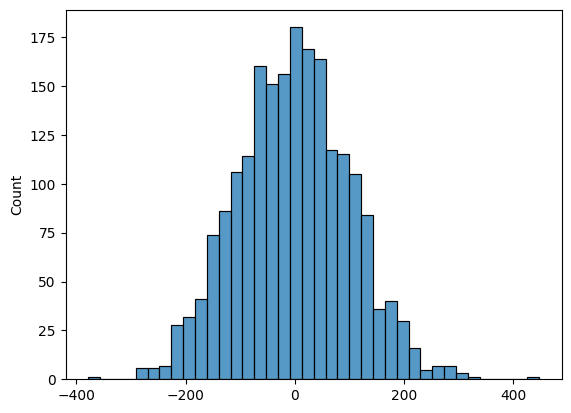

In [49]:
import numpy as np
import seaborn as sns

sns.histplot(np.random.normal(0,100,2048))

In [50]:
import itertools

double_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
flatten_list = list(itertools.chain.from_iterable(double_list))
flatten_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
model.eval()
z_ = []
with torch.no_grad():
    for x, _ in dataloader:
        x = x.float().to(self.device)
        z = model.encode(x)
        z_.append(z.detach()) # z_.shape = [iteration횟수 * batch, 벡터의 차원]
z_ = torch.cat(z_)

TypeError: cat(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [106]:
eps = 0.1
z_ = []
for i in range(100):
    z = np.random.normal(0,1,2048)
    z_.append(z)
z_ = np.array(z_)
c = np.mean(z_, axis=0) # 각 원소의 평균 값이 나옴(512)
c[(abs(c) < eps) & (c < 0)] = -eps
c[(abs(c) < eps) & (c > 0)] = eps
# return c

In [108]:
z

array([ 0.92631013, -0.22968164,  0.48048962, ..., -0.48315193,
       -0.91726963, -0.75060971])

<AxesSubplot:ylabel='Count'>

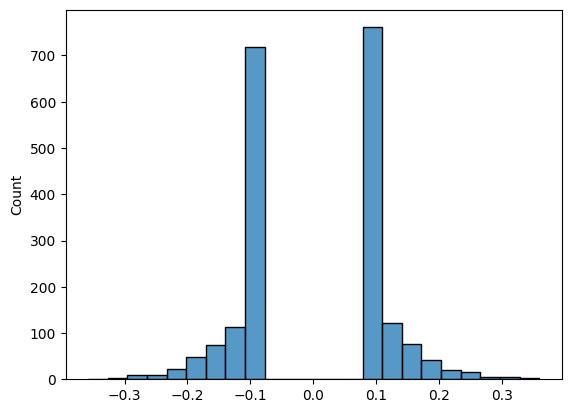

In [107]:
sns.histplot(c)